In [69]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the assets to include in the portfolio
assets = ['AAPL', 'GOOG', 'IBM', 'MSFT', 'AMZN']

# Define the date range for which to get the data
start_date = '2015-01-01'
end_date = '2016-05-07'

# Use yfinance to get the daily close prices for the assets
prices = pd.DataFrame()
for asset in assets:
    asset_data = yf.download(asset, start=start_date, end=end_date)['Adj Close']
    prices[asset] = asset_data

print(prices)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                 AAPL       GOOG         IBM       MSFT       AMZN
Date                                                              
2015-01-02  24.531761  26.168653  106.693802  40.709461  15.426000
2015-01-05  23.840666  25.623152  105.014977  40.335117  15.109500
2015-01-06  23.842911  25.029282  102.750221  39.743095  14.764500
2015-01-07  24.177237  24.986401  102.078674  40.248032  14.921000
2015-01-08  25.106184  25.065184  104.297371  41.432056  15.023000
...               ...        ...         ...        ...        ...
2016-05-02  21.485147  34.910500   99.771889  45.585773  34.192501
2016-05-03  21.838488  34.618000   98.988922  44.838

                AAPL      GOOG       IBM      MSFT      AMZN
Date                                                        
2015-01-05 -0.028171 -0.020846 -0.015735 -0.009196 -0.020517
2015-01-06  0.000094 -0.023177 -0.021566 -0.014678 -0.022833
2015-01-07  0.014022 -0.001713 -0.006536  0.012705  0.010600
2015-01-08  0.038422  0.003153  0.021735  0.029418  0.006836
2015-01-09  0.001072 -0.012951  0.004355 -0.008405 -0.011749
...              ...       ...       ...       ...       ...
2016-05-02 -0.001067  0.007503 -0.004591  0.014839  0.036780
2016-05-03  0.016446 -0.008379 -0.007848 -0.016400 -0.018323
2016-05-04 -0.010401  0.004824  0.000833  0.001808 -0.000626
2016-05-05 -0.004059  0.008236  0.015390  0.001404 -0.017603
2016-05-06 -0.005577  0.013815  0.015303  0.009011  0.022546

[338 rows x 5 columns]


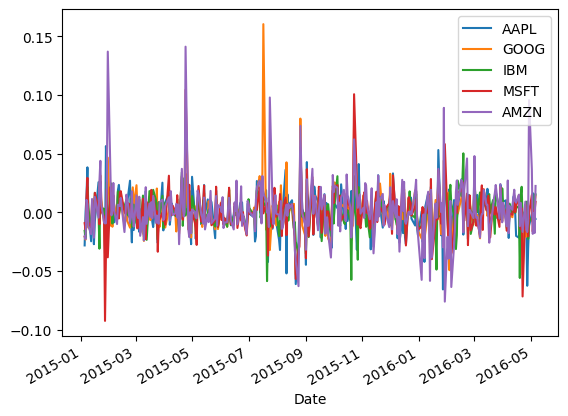

AAPL   -0.000254
GOOG    0.001065
IBM    -0.000030
MSFT    0.000480
AMZN    0.002566
dtype: float64
          AAPL      GOOG       IBM      MSFT      AMZN
AAPL  0.000299  0.000122  0.000106  0.000166  0.000140
GOOG  0.000122  0.000324  0.000099  0.000183  0.000236
IBM   0.000106  0.000099  0.000197  0.000122  0.000086
MSFT  0.000166  0.000183  0.000122  0.000319  0.000203
AMZN  0.000140  0.000236  0.000086  0.000203  0.000517


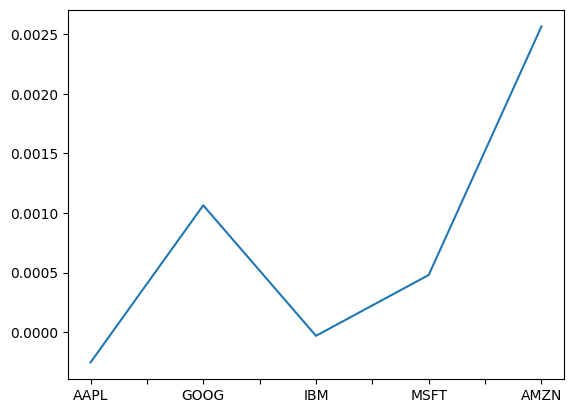

In [70]:
# Calculate the daily returns for the assets
returns = prices.pct_change().dropna()

# Calculate the mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()
print(returns)
returns.plot()
plt.show()
print(mean_returns)
mean_returns.plot()
print(cov_matrix)

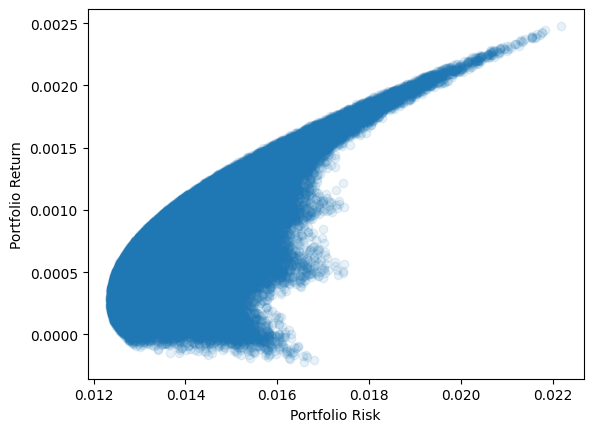

In [71]:
mu = np.mean(returns, axis=0)
cov = np.cov(returns, rowvar=False)

# Define the number of portfolios to generate
num_portfolios = 100000

# Generate random portfolios with different asset weights
weights = np.random.dirichlet(np.ones(len(assets)), size=num_portfolios)

# Calculate portfolio returns and risks
portfolio_returns = np.dot(weights, mu)
portfolio_risks = []
for i in range(num_portfolios):
    portfolio_risk = np.sqrt(np.dot(weights[i].T, np.dot(cov, weights[i])))
    portfolio_risks.append(portfolio_risk)

# Plot the results on a scatter plot
import matplotlib.pyplot as plt

plt.scatter(portfolio_risks, portfolio_returns, alpha=0.1)
plt.xlabel('Portfolio Risk')
plt.ylabel('Portfolio Return')
plt.show()

In [72]:
# Define the risk-free rate
risk_tolerance = 0.64

# Define the objective function for optimization
def objective(weights):
    return np.dot(weights.T, np.dot(cov_matrix, weights)) - risk_tolerance * np.dot(mean_returns.T, weights)

# Define the optimization constraints
def constraint(weights):
    return np.sum(weights) - 1

# Set up the optimization problem
initial_guess = [1.0 / len(assets)] * len(assets)
bounds = [(0, 1)] * len(assets)
constraints = [{'type': 'eq', 'fun': constraint}]

# Solve for the optimal weights
res = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints, options={'maxiter': 1000})
optimal_weights = res.x

# Calculate the expected return and standard deviation for the optimal portfolio
portfolio_returns = np.dot(optimal_weights, mean_returns)
portfolio_std = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))

# Print the optimal portfolio weights and statistics
print('Optimal Portfolio Weights:')
for i in range(len(assets)):
    print(f'{assets[i]}: {optimal_weights[i]}')
print('\n')
print(f'Expected Return: {portfolio_returns}')
print(f'Standard Deviation: {portfolio_std}')

Optimal Portfolio Weights:
AAPL: 0.0
GOOG: 0.2338711880542171
IBM: 1.6804883835439244e-16
MSFT: 1.1102230246251565e-16
AMZN: 0.7661288119457826


Expected Return: 0.0022149549303062486
Standard Deviation: 0.02014548280806893
